Importaciones:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
original = cv2.imread('img/aurora.png')
blackwhite = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

In [6]:
# Mostrar imagenes de cv2 con plt
def display(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



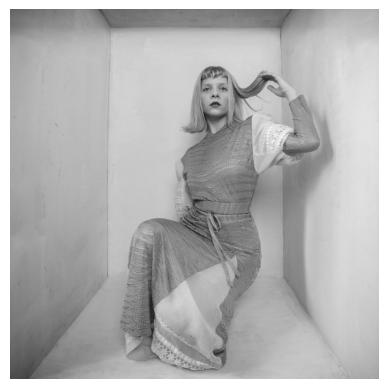

In [7]:
display(blackwhite)

## Implementar una convolución 2D
Implementarla desde cero usando NumPy y aplicando un kernel personalizado a cada pixel.

### Definición de la función

In [9]:
def convolucionar_imagen(imagen, kernel):
    alto, ancho = imagen.shape
    k_alto, k_ancho = kernel.shape
    pad_alto = k_alto // 2
    pad_ancho = k_ancho // 2

    # Crear una imagen de salida del mismo tamaño, inicializada en ceros
    imagen_filtrada = np.zeros_like(imagen)

    # Rellenar la imagen original con ceros en los bordes (padding)
    imagen_padded = np.pad(imagen, ((pad_alto, pad_alto), (pad_ancho, pad_ancho)), mode='constant')

    # Recorrer cada píxel de la imagen original
    for i in range(alto):
        for j in range(ancho):
            # Extraer la región de interés
            region = imagen_padded[i:i + k_alto, j:j + k_ancho]
            # Aplicar el producto punto entre el kernel y la región
            valor = np.sum(region * kernel)
            # Asignar el valor al píxel correspondiente (recortando entre 0-255)
            imagen_filtrada[i, j] = np.clip(valor, 0, 255)

    return imagen_filtrada.astype(np.uint8)


## Kernel de Sharpening (enfoque)

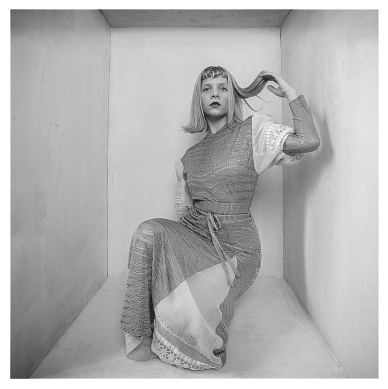

In [12]:
kernel_enfoque = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

imagen_enfocada = convolucionar_imagen(blackwhite, kernel_enfoque)
display(imagen_enfocada)


## Kernel de Blur

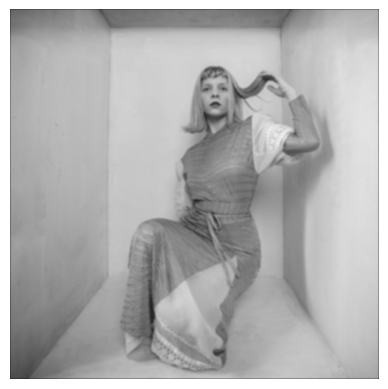

In [14]:
kernel_blur = np.array([
    [1,  1,  1,  1,  1],
    [1,  1,  1,  1,  1],
    [1,  1,  1,  1,  1],
    [1,  1,  1,  1,  1],
    [1,  1,  1,  1,  1]
]) / 25  # Promedio de 25 elementos

blur = convolucionar_imagen(blackwhite, kernel_blur)
display(blur)


## Kernel de Sobel (derivadas cruzadas)

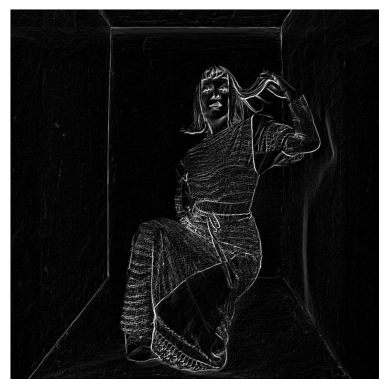

In [15]:
kernel_sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

kernel_sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Aplicar ambos kernels
imagen_dx = convolucionar_imagen(blackwhite, kernel_sobel_x)
imagen_dy = convolucionar_imagen(blackwhite, kernel_sobel_y)

# Magnitud del gradiente (esquinas = regiones con alto gradiente en ambas direcciones)
sobel_derivadas_cruzadas = np.hypot(imagen_dx, imagen_dy)
sobel_derivadas_cruzadas = np.clip(sobel_derivadas_cruzadas, 0, 255).astype(np.uint8)

display(sobel_derivadas_cruzadas)


## Kernel de Sobel Horizontal

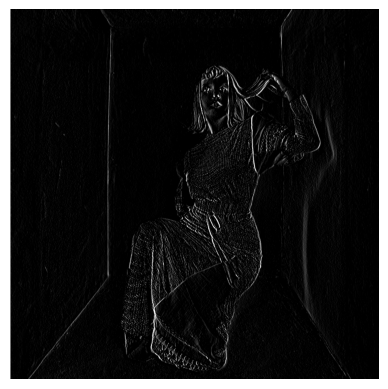

In [16]:
# Definir un kernel para detección de bordes (Sobel horizontal por ejemplo)
kernel_bordes = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_horizontal = convolucionar_imagen(blackwhite, kernel_bordes)
display(sobel_horizontal)

## Comparación: manual vs filtro cv2

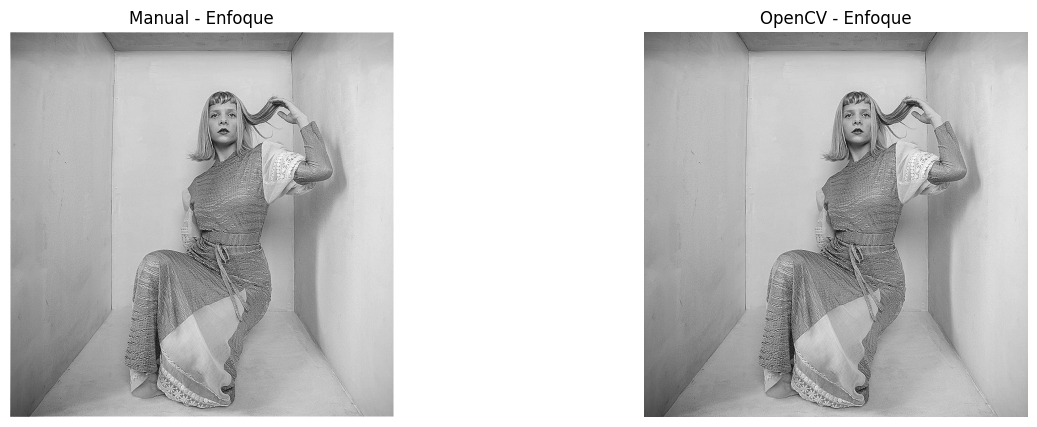

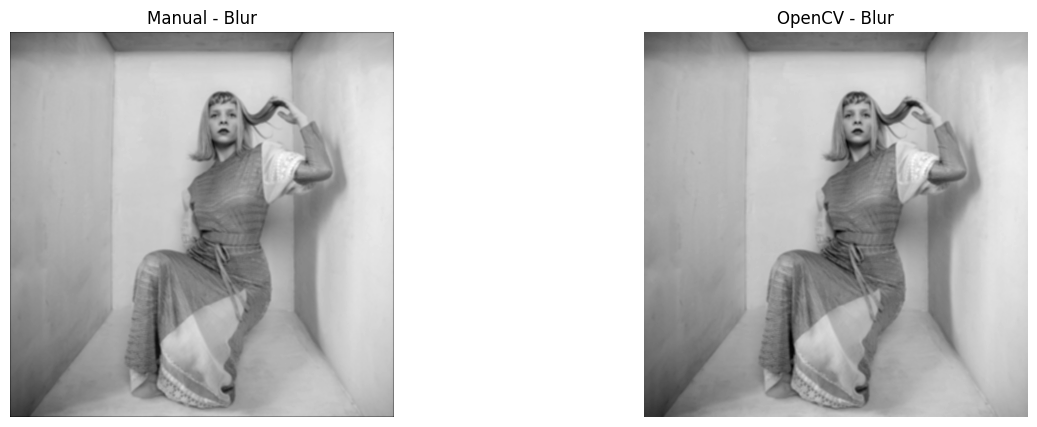

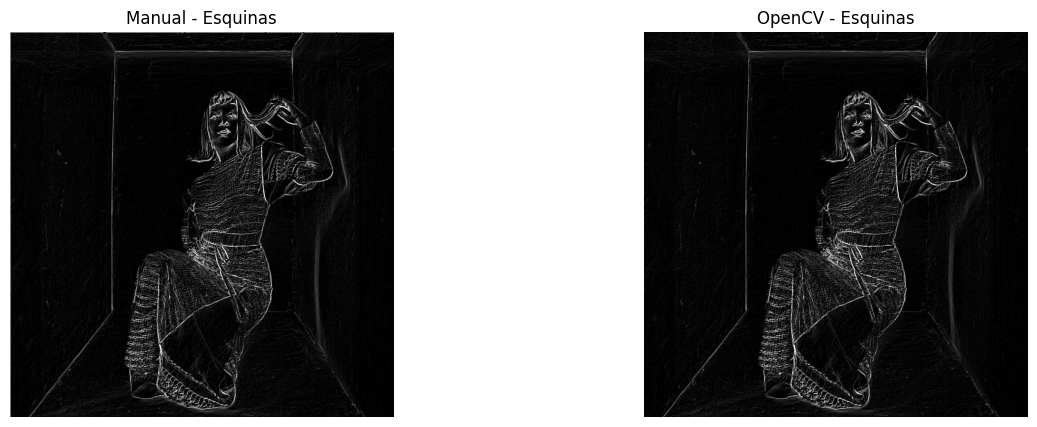

In [19]:
# Función auxiliar para mostrar imágenes lado a lado
def mostrar_comparacion(imagenes, titulos):
    plt.figure(figsize=(15, 5))
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(1, len(imagenes), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.show()

# ========== 1. Enfoque ==========
imagen_manual_enfoque = convolucionar_imagen(blackwhite, kernel_enfoque)
imagen_cv_enfoque = cv2.filter2D(blackwhite, -1, kernel_enfoque)
mostrar_comparacion(
    [imagen_manual_enfoque, imagen_cv_enfoque],
    ["Manual - Enfoque", "OpenCV - Enfoque"]
)

# ========== 2. Blur ==========
imagen_manual_blur = convolucionar_imagen(blackwhite, kernel_blur)
imagen_cv_blur = cv2.filter2D(blackwhite, -1, kernel_blur)
mostrar_comparacion(
    [imagen_manual_blur, imagen_cv_blur],
    ["Manual - Blur", "OpenCV - Blur"]
)

# ========== 3. Detección de esquinas ==========
# Convolución manual
dx_manual = convolucionar_imagen(blackwhite, kernel_sobel_x)
dy_manual = convolucionar_imagen(blackwhite, kernel_sobel_y)
grad_manual = np.hypot(dx_manual, dy_manual).astype(np.uint8)

# Convolución con OpenCV
dx_cv = cv2.filter2D(blackwhite, -1, kernel_sobel_x)
dy_cv = cv2.filter2D(blackwhite, -1, kernel_sobel_y)
grad_cv = np.hypot(dx_cv, dy_cv).astype(np.uint8)

mostrar_comparacion(
    [grad_manual, grad_cv],
    ["Manual - Esquinas", "OpenCV - Esquinas"]
)


### Exportación de imágenes

In [21]:
cv2.imwrite('img/blackwhite.png', blackwhite)
cv2.imwrite('img/blur.png', blur)
cv2.imwrite('img/enfocada.png', imagen_enfocada)
cv2.imwrite('img/sobel_derivadas_cruzadas.png', sobel_derivadas_cruzadas)
cv2.imwrite('img/sobel_horizontal.png', sobel_horizontal)

True